# Data Analyst and Automation Specialist Test Trial for Virtual Latinos
Lina Marcela Ruiz Galvis,Colombia

## Initialization 

In [1]:
# Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import sklearn
#from sklearn.datasets import make_regression
#from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression, Ridge, Lasso
#from sklearn.metrics import mean_squared_error, r2_score

from xgboost import XGBRegressor
from scipy.optimize import curve_fit


In [2]:
# Functions

In [3]:
# Data Load
dataE01 = pd.read_excel("main_data.xlsx", sheet_name=0)
dataE02 = pd.read_excel("main_data.xlsx", sheet_name=1)

## Exercise 1

### **Data Exploration**

In [3]:
dataE01.head(3)

,agreement_id,created_time_(zoho_crm),status,company_name,customer_name,email,va_legal_name,agreement_official_start_date,agreement_end_date
0,12530111069,2020-11-17 00:00:00,Active,Klipped Kippahs LLC,Jon Kaweblum,jonjon-k@investordbat.com,Wendy Madrid,2020-11-23 00:00:00,2026-01-01 00:00:00
1,12530111070,2020-11-20 00:00:00,Terminated by Client,Marques Investments LLC,Josue Sanchez,j-sanche@gmail.com,Ivan Hernandez,2020-11-23 00:00:00,2021-04-02 00:00:00
2,12530111071,2021-02-15 00:00:00,Terminated by Client,"DC Law, PLLC",Jeffrey Craig,jeffje-cr@adminvc.com,Alan Aguila,2021-02-15 00:00:00,2023-04-28 00:00:00


In [4]:
len(dataE01)

5979

In [5]:
dataE01.columns

Index(['agreement_id', 'created_time_(zoho_crm)', 'status', 'company_name',
       'customer_name', 'email', 'va_legal_name',
       'agreement_official_start_date', 'agreement_end_date'],
      dtype='object')

In [7]:
dataE01["status"].unique()

array(['Active', 'Terminated by Client', 'Terminated by VA',
       'Terminated by VL', 'Void - New Agreement Made', 'Pending', 'Lost',
       'Emergency cancellation', '(No value)'], dtype=object)

In [35]:
summary = pd.DataFrame({
    "column": dataE01.columns,
    "pandas_dtype": dataE01.dtypes.values,
    "python_types": [
        dataE01[col].dropna().map(type).unique() for col in dataE01.columns
    ],
    "unique_values": [
        dataE01[col].unique() for col in dataE01.columns
    ]
})

summary


,column,pandas_dtype,python_types,unique_values
0,agreement_id,int64,[<class 'int'>],"[12530111069, 12530111070, 12530111071, 125301..."
1,created_time_(zoho_crm),datetime64[ns],[<class 'pandas._libs.tslibs.timestamps.Timest...,"[2020-11-17 00:00:00, 2020-11-20 00:00:00, 202..."
2,status,object,[<class 'str'>],"[Active, Terminated by Client, Terminated by V..."
3,company_name,object,[<class 'str'>],"[Klipped Kippahs LLC, Marques Investments LLC,..."
4,customer_name,object,[<class 'str'>],"[Jon Kaweblum, Josue Sanchez, Jeffrey Craig, B..."
5,email,object,[<class 'str'>],"[jonjon-k@investordbat.com, j-sanche@gmail.com..."
6,va_legal_name,object,[<class 'str'>],"[Wendy Madrid, Ivan Hernandez, Alan Aguila, Ga..."
7,agreement_official_start_date,datetime64[ns],[<class 'pandas._libs.tslibs.timestamps.Timest...,"[2020-11-23 00:00:00, 2021-02-15 00:00:00, NaT..."
8,agreement_end_date,datetime64[ns],[<class 'pandas._libs.tslibs.timestamps.Timest...,"[2026-01-01 00:00:00, 2021-04-02 00:00:00, 202..."


In [ ]:
# The agreement_id is unique by row
counts_df = (
    dataE01["agreement_id"]
    .value_counts(dropna=False)
    .reset_index()
    .rename(columns={
        "index": "agreement_id",
        "column_name": "count"
    })
)

counts_df


,agreement_id,count
0,12530111069,1
1,14786978077,1
2,14864904037,1
3,14863727650,1
4,14856343077,1
...,...,...
5974,12531786310,1
5975,12531786309,1
5976,12531786308,1
5977,12531786307,1


In [11]:
counts_df["count"].unique()

array([1])

In [49]:
dataE01["status"].value_counts()

status
Terminated by Client         2266
Active                       1956
Terminated by VA              977
Void - New Agreement Made     354
Lost                          203
Pending                       119
Terminated by VL               97
Emergency cancellation          4
(No value)                      3
Name: count, dtype: int64

In [37]:
counts_df = (
    dataE01["company_name"]
    .value_counts(dropna=False)
    .reset_index()
    .rename(columns={
        "index": "company_name",
        "column_name": "count"
    })
)

counts_df

,company_name,count
0,Bloominari dba Virtual Latinos,198
1,The Matian Firm,152
2,Law Offices of Chris M. Ingram,72
3,"American Legal Media, LLC",59
4,"The Morgan Law Group, P.A.",57
...,...,...
2267,Downtown Financial Group,1
2268,Carlos Landa Realtor,1
2269,Sinsemilla LLC,1
2270,Millan Construction,1


In [39]:
counts_df[counts_df["count"]==4]

,company_name,count
162,Johnnies Appliances,4
163,Sierra Interpreting Inc.,4
164,Neurvana Health Inc.,4
165,SEF Krell,4
166,The UDDA LLC,4
...,...,...
225,Winalytics LLC,4
226,Ujala Life,4
227,"South Miami Spine and Joint, LLC",4
228,Law Office of Jasmit Dhaliwal PLLC,4


In [18]:
# helper to extract email domain safely
def email_domain(series):
    return (
        series.dropna()
        .astype(str)
        .str.lower()
        .str.split("@")
        .str[-1]
        .unique()
    )

out = (
    dataE01.groupby("company_name", dropna=False)
    .agg(
        customer_names=("customer_name", lambda s: sorted(s.dropna().unique())),
        n_customer_names=("customer_name", lambda s: s.nunique(dropna=True)),

        emails=("email", lambda s: sorted(s.dropna().unique())),
        n_emails=("email", lambda s: s.nunique(dropna=True)),

        email_domains=("email", lambda s: sorted(email_domain(s))),
        n_email_domains=("email", lambda s: len(email_domain(s))),
    )
    .reset_index()
)
out["customer_names"] = out["customer_names"].apply(lambda x: " | ".join(x))
out["emails"] = out["emails"].apply(lambda x: " | ".join(x))
out["email_domains"] = out["email_domains"].apply(lambda x: " | ".join(x))

out


,company_name,customer_names,n_customer_names,emails,n_emails,email_domains,n_email_domains
0,1.5Degrees LLC (d.b.a OnePointFive),Neil Yeoh,1,neilnei-yeoh@kirkao.degree,1,kirkao.degree,1
1,"101 Federal Street, LLC dba BSpoke Studios",Mark Partin,1,markma-par@medicalverihlue.com,1,medicalverihlue.com,1
2,1031 Tax-Free Exchange Solutions,Logan Snodgrass,1,loganloga-snodgr@incvacae.com,1,incvacae.com,1
3,"10858 OPCO, LLC",Sebastian Trujillo,1,sebsebasti-trujillo@lawassitant.com,1,lawassitant.com,1
4,10x Luxury Affiliate,Laura Mowell,1,ceolaura-mowe@lawyersass.com,1,lawyersass.com,1
...,...,...,...,...,...,...,...
2432,nod Innovations Inc (d/b/a nodMD),Stephan Kindt,1,skindtst-k@llcrenant.com,1,llcrenant.com,1
2433,seeUplay,Eduardo Gorodzinsky,1,eduardoedu-g@kickboxingvad.com,1,kickboxingvad.com,1
2434,"urSwim, LLC",Marina Mentzel,1,marinamar-me@salesmaant.com,1,salesmaant.com,1
2435,"vi Experts, Inc",Matt Murphy,1,mmurphymatt-murphy@customerino.com,1,customerino.com,1


In [19]:
out["n_customer_names"].unique()

array([ 1,  2,  3,  4,  6,  5, 10])

In [20]:
out[out["n_customer_names"]==10]

,company_name,customer_names,n_customer_names,emails,n_emails,email_domains,n_email_domains
2143,The Institute for Liver Health II LLC,Brett Lantz | Chelsea Mihaylo Hum | Chelsea Mi...,10,blantzbr-l@valuelles.com | chelsea-mihay@value...,10,assistantspet.com | valuelles.com | waveleer.com,3


In [22]:
out[out["n_customer_names"]==6]

,company_name,customer_names,n_customer_names,emails,n_emails,email_domains,n_email_domains
551,"DC Law, PLLC",Jeff Craig | Jeffrey Craig | Johana Rangel | M...,6,Jeff_Craigjeffre-cr@adminvc.com | jeffje-cr@ad...,6,adminvc.com,1


In [21]:
out[out["n_customer_names"]==5]

,company_name,customer_names,n_customer_names,emails,n_emails,email_domains,n_email_domains
894,HASAN BADDAY MD PC,Abby Richardson | Abigail Richardson | Alexa A...,5,alexaaalexa-an@solutionsassint.com | piabb-ric...,3,solutionsassint.com,1
2179,"The Morgan Law Group, P.A.",Alikhy LeivaCrespo | Barbara Garcia | Ciro Sau...,5,aleivaalikh-leivacrespo@managerappte.net | bga...,5,managerappte.net,1
2301,Valley Perinatal,Allison Turner | Emily Blend | Jamie Grell | K...,5,al-turner@assistantassillc.com | em-blen@assis...,5,assistantassillc.com | setterla.care,2


In [23]:
out[out["n_customer_names"]==4]

,company_name,customer_names,n_customer_names,emails,n_emails,email_domains,n_email_domains
60,Abramson Levin & Gindi LLP,Alexis Benavidez | Brok Bunnell | Lupe Chavarr...,4,brokbro-bunne@assistantacher.com | lexialexis-...,4,assistantacher.com,1
152,"American Legal Media, LLC",Armando Martinez | Armando Martineze | Lupe Ch...,4,armando.marm-marti@assistantacher.com | lupel-...,3,assistantacher.com,1
178,"ApexDrop, LLC",Cahla Green | Jillian Salamon | Mathieu Sander...,4,cahl-gre@robertsclearning.com | jillianjilli-s...,5,assistantotherue.com | mediaassilc.com | rober...,3
310,Bloominari dba Virtual Latinos,Bloominari dba Virtual Latinos | Jaime Naca | ...,4,jaimeja-n@assistantaccant.com,1,assistantaccant.com,1
331,Boomerang Case Management,Jackie Russey | Jeffrey Craig | Mike Virgin | ...,4,Craigj-craig@adminvc.com | Jeff_Craigjeffre-cr...,6,adminvc.com | tomczakpralist.io,2
559,DMGgo,Andrew Polito | Jaclyn Gallagher | Kelsey Ross...,4,andrewpandre-polito@logisticsassistant.com | j...,5,interpretingcooia.com | logisticsassistant.com,2
1162,LabFellows,(No value) | Julio De Unamuno | Julio de Unamu...,4,(No value) | juliodjulio-un@figueroaspealist.com,2,(no value) | figueroaspealist.com,2
1233,Law Offices of Chris M. Ingram,Chris Ingram | Delora Coulson | Jackie Iffie |...,4,chrischr-in@otherassitake.com | deloradelora-c...,4,otherassitake.com,1
1515,NAHREP,Maria Barrios | Marta Becerra | Marta` Becerra...,4,mbarriosmari-b@valuellcs.org | mbecerram-becer...,3,valueacartin.com | valuellcs.org,2
1554,Next Call Club,Andrew Aceto | Andrew Filar | Carissa McElligo...,4,andre-aceto@appointmentassirt.com | andrewandr...,4,appointmentassirt.com,1


In [25]:
len(out[out["n_customer_names"]==1])

2235

In [28]:
# Group by customer_name and aggregate unique company_name + email,
# plus counts of distinct values for each.
out = (
    dataE01.groupby("customer_name", dropna=False)
    .agg(
        company_names=("company_name", lambda s: " | ".join(sorted(map(str, s.dropna().unique())))),
        n_company_names=("company_name", lambda s: s.nunique(dropna=True)),
        emails=("email", lambda s: " | ".join(sorted(map(str, s.dropna().unique())))),
        n_emails=("email", lambda s: s.nunique(dropna=True)),
    )
    .reset_index()
)
out


,customer_name,company_names,n_company_names,emails,n_emails
0,\t Joseph Corsello,Dojo Floorings LLC DBA Floor Coverings Interna...,1,jo-cello@legalchines.com,1
1,Ana Garcia,"Ana B. Garcia, CPA",1,anaana-garci@finepist.com,1
2,Angel Gonzalez Marcano,GONZALEZ MARCANO LLC,1,abogadoan-gonza@assistantassisator.com,1
3,Douglas Caminita,Caminita Insurance Agency Corp,1,dcaminitadou-caminita@legalaant.com,1
4,Edwin Joel Reyes,Blue Ocean Solutions LLC,1,joeled-r@llcvtant.com,1
...,...,...,...,...,...
2609,lisa dasher,"Law Office of Lisa Uresti, PLLC",1,lisal-dash@andesmat.com,1
2610,luis Chavez,RRMP construction in handyman services LLC,1,luiscamposl-chavez@designerassl.com,1
2611,sandeep shahi,"JS imports, LLC",1,sandeepsand-shah@legalspnt.in,1
2612,tony.perkins@accessparks.com,"AccessParks, LLC",1,tony-perki@legaliative.com,1


In [29]:
out["n_company_names"].unique()

array([1, 2, 3, 4])

In [31]:
out[out["n_company_names"]==4]

,customer_name,company_names,n_company_names,emails,n_emails
1117,Jeffrey Craig,Abacus Analytics | Bloodhound Investigations |...,4,Craigj-craig@adminvc.com | Jeff_Craigjeffre-cr...,4


### **Data Cleaning**

In [4]:
# Variables type standarization
dataE01["created_time_(zoho_crm)"] = pd.to_datetime(
    dataE01["created_time_(zoho_crm)"],
    errors="coerce"
)
dataE01["agreement_official_start_date"] = pd.to_datetime(
    dataE01["agreement_official_start_date"],
    errors="coerce"
)
dataE01["agreement_end_date"] = pd.to_datetime(
    dataE01["agreement_end_date"],
    errors="coerce"
)
len(dataE01)

5979

In [5]:
# Delete duplicates rows
dataE01 = dataE01.drop_duplicates()
len(dataE01)

5979

In [6]:
# Delete the rows without agreement_official_start_date or agreement_end_date
dataE01 = dataE01.dropna(
    subset=["agreement_end_date", "agreement_official_start_date"]
)
len(dataE01)

5140

In [7]:
dataE01["status"].unique()

array(['Active', 'Terminated by Client', 'Terminated by VA',
       'Terminated by VL'], dtype=object)

In [8]:
# Delete Bloominari dba Virtual Latinos ???

### **Forecasting analysis**

#### **Building database**

In [53]:
# Each company first and last activation date
company_lifecycle = (
    dataE01.groupby("company_name", dropna=False)
    .agg(
        company_start=("agreement_official_start_date", "min"),
        company_end=("agreement_end_date", "max"),
    )
    .reset_index()
)

company_lifecycle


,company_name,company_start,company_end
0,1.5Degrees LLC (d.b.a OnePointFive),2023-11-06,2026-01-01
1,"101 Federal Street, LLC dba BSpoke Studios",2024-08-12,2026-01-01
2,1031 Tax-Free Exchange Solutions,2025-05-05,2025-06-20
3,"10858 OPCO, LLC",2023-02-21,2024-03-15
4,10x Luxury Affiliate,2025-06-23,2026-01-01
...,...,...,...
2267,nod Innovations Inc (d/b/a nodMD),2022-04-18,2022-11-04
2268,seeUplay,2024-11-25,2025-01-17
2269,"urSwim, LLC",2025-02-03,2026-01-01
2270,"vi Experts, Inc",2025-05-12,2026-01-01


In [54]:
company_lifecycle[company_lifecycle["company_end"]=="2026-01-01"]

,company_name,company_start,company_end
0,1.5Degrees LLC (d.b.a OnePointFive),2023-11-06,2026-01-01
1,"101 Federal Street, LLC dba BSpoke Studios",2024-08-12,2026-01-01
4,10x Luxury Affiliate,2025-06-23,2026-01-01
10,2527767 Ontario Inc,2025-11-10,2026-01-01
17,5-Eleven Hoops,2024-08-12,2026-01-01
...,...,...,...
2258,Zermatt Payments LLC,2025-07-28,2026-01-01
2259,Zhang-Louie PLLC,2022-09-06,2026-01-01
2265,"iThrive Wellness, LLC",2024-02-19,2026-01-01
2269,"urSwim, LLC",2025-02-03,2026-01-01


In [55]:
# Create a date range covering the full period
date_range = pd.date_range(
    start=company_lifecycle["company_start"].min(),
    end=company_lifecycle["company_end"].max() - pd.Timedelta(days=1),
    freq="D"
)


In [56]:
# Count how many companies are active per day: A company is active on a date if company_start <= date < company_end
temporal_series = pd.DataFrame({"date": date_range})

temporal_series["active_companies"] = temporal_series["date"].apply(
    lambda d: (
        (company_lifecycle["company_start"] <= d)
        & (company_lifecycle["company_end"] >= d)
    ).sum()
)

temporal_series.head()

,date,active_companies
0,2019-04-12,1
1,2019-04-13,1
2,2019-04-14,1
3,2019-04-15,1
4,2019-04-16,1


In [34]:
temporal_series.tail()

,date,active_companies
2451,2025-12-27,923
2452,2025-12-28,923
2453,2025-12-29,923
2454,2025-12-30,923
2455,2025-12-31,923


In [35]:
# Count how new companies are active per day: 
new_per_day = (
    company_lifecycle["company_start"]
    .value_counts()
    .rename_axis("date")
    .reset_index(name="new_companies")
)

temporal_series = temporal_series.merge(
    new_per_day, on="date", how="left"
).fillna({"new_companies": 0})


In [59]:
temporal_series = temporal_series.set_index("date")
temporal_series = temporal_series.sort_index()

In [37]:
temporal_series.head(2)

,active_companies,new_companies
date,,
2019-04-12,1,1.0
2019-04-13,1,0.0


In [38]:
type(temporal_series.index), temporal_series.index.dtype


(pandas.core.indexes.datetimes.DatetimeIndex, dtype('<M8[ns]'))

In [39]:
temporal_series.index

DatetimeIndex(['2019-04-12', '2019-04-13', '2019-04-14', '2019-04-15',
               '2019-04-16', '2019-04-17', '2019-04-18', '2019-04-19',
               '2019-04-20', '2019-04-21',
               ...
               '2025-12-22', '2025-12-23', '2025-12-24', '2025-12-25',
               '2025-12-26', '2025-12-27', '2025-12-28', '2025-12-29',
               '2025-12-30', '2025-12-31'],
              dtype='datetime64[ns]', name='date', length=2456, freq=None)

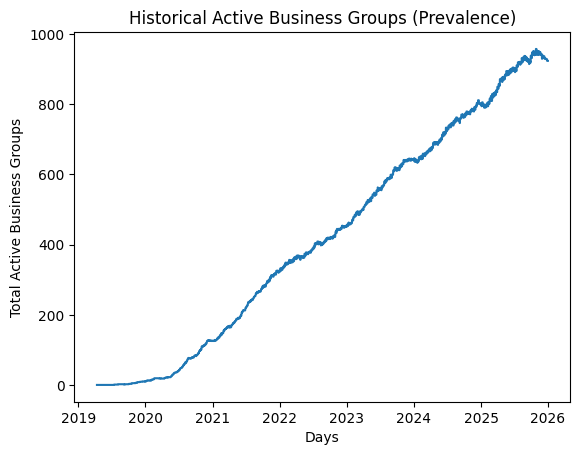

In [61]:
plt.figure()
plt.plot(
    temporal_series.index,
    temporal_series["active_companies"]
)
plt.xlabel("Days")
plt.ylabel("Total Active Business Groups")
plt.title("Historical Active Business Groups (Prevalence)")
plt.show()


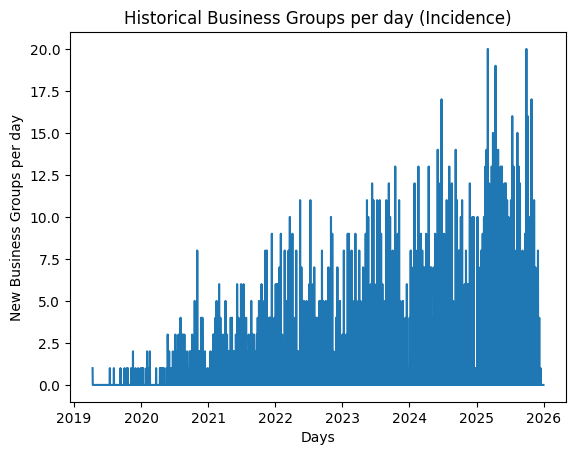

In [42]:
plt.figure()
plt.plot(
    temporal_series.index,
    temporal_series["new_companies"]
)
plt.xlabel("Days")
plt.ylabel("New Business Groups per day")
plt.title("Historical Business Groups per day (Incidence)")
plt.show()

#### **Linear Trend**

In [71]:
# MODEL
y = temporal_series["active_companies"].values
x = np.arange(len(y))  # 0,1,2,...,N-1

# Fit y = a*x + b
a, b = np.polyfit(x, y, deg=1)

# Predicted values
y_pred = a * x + b

In [ ]:
# TEST
# R-squared (goodness of fit)
ss_res = ((y - y_pred) ** 2).sum()
ss_tot = ((y - y.mean()) ** 2).sum()

r_squared = 1 - ss_res / ss_tot
print(f"r2: {r_squared}")
# RMSE (error magnitude)
rmse = np.sqrt(((y - y_pred) ** 2).mean())
print(f"rmse: {rmse}")

r2: 0.9912677982143381
rmse: 28.910510098816097


In [72]:
# --- Forecast next 12 months ---
h = 12
x_future = np.arange(len(y), len(y) + h)          # N..N+h-1
y_pred_future = a * x_future + b                  # forecast values

# Build future monthly dates (keeps your same "monthly" spacing)
last_date = pd.to_datetime(temporal_series.index[-1])
future_dates = pd.date_range(
    start=last_date + pd.offsets.DateOffset(months=1),
    periods=h,
    freq="MS"  # month start; use "M" if your index is month-end
)



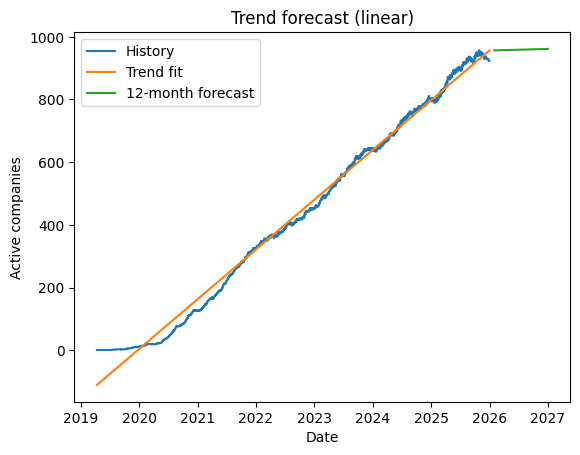

In [73]:
# Combine forecast series (history fit + future)
trend_history = pd.Series(y_pred, index=temporal_series.index, name="trend_fit")
trend_forecast = pd.Series(y_pred_future, index=future_dates, name="trend_forecast")

# --- Plot ---
plt.figure()
plt.plot(temporal_series.index, temporal_series["active_companies"], label="History")
plt.plot(trend_history.index, trend_history.values, label="Trend fit")
plt.plot(trend_forecast.index, trend_forecast.values, label="12-month forecast")
plt.title("Trend forecast (linear)")
plt.xlabel("Date")
plt.ylabel("Active companies")
plt.legend()
plt.show()

In [74]:
y_pred_future.mean()

np.float64(958.9419103150839)

#### **Logistic trend**

In [86]:
# y values
y = temporal_series["active_companies"].values

# numeric time index (0, 1, 2, ...)
t = np.arange(len(y))


In [87]:
def logistic(t, K, r, t0):
    return K / (1 + np.exp(-r * (t - t0)))


In [88]:
K_init  = y.max() * 1.2     # capacity slightly above current max
r_init  = 0.01              # moderate growth
t0_init = len(y) / 2        # midpoint

p0 = [K_init, r_init, t0_init]


In [89]:
params, cov = curve_fit(
    logistic,
    t,
    y,
    p0=p0,
    maxfev=10_000
)

K_est, r_est, t0_est = params

print(f"Estimated carrying capacity (K): {K_est:.0f}")
print(f"Estimated growth rate (r): {r_est:.4f}")
print(f"Estimated inflection point (t0): {t0_est:.1f}")


Estimated carrying capacity (K): 998
Estimated growth rate (r): 0.0023
Estimated inflection point (t0): 1422.3


In [82]:
temporal_series.index[1422]

Timestamp('2023-03-04 00:00:00')

In [91]:
# fit
y_hat = logistic(t, K_est, r_est, t0_est)
resid = y - y_hat

mae = np.mean(np.abs(resid))
print(f"MAE: {mae:.1f}")
rmse = np.sqrt(np.mean(resid**2))
print(f"rmse: {rmse:.1f}")

MAE: 28.8
rmse: 34.1


In [92]:
ss_res = np.sum((y - y_hat)**2)
ss_tot = np.sum((y - np.mean(y))**2)
r2 = 1 - ss_res/ss_tot
r2

np.float64(0.9878699665967677)

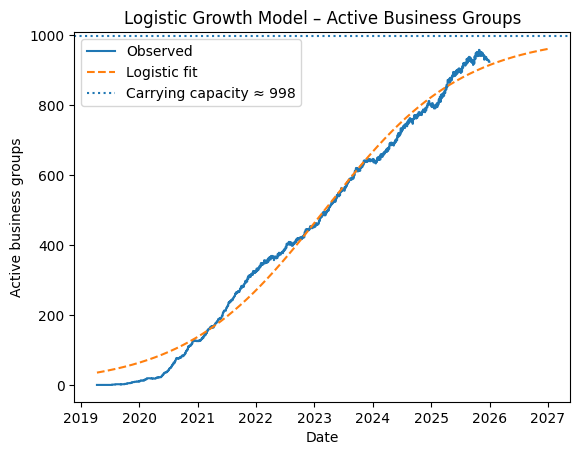

In [ ]:
t_fit = np.linspace(0, len(y) + 365, 1000)  # extend into future
y_fit = logistic(t_fit, K_est, r_est, t0_est)

plt.figure()
plt.plot(temporal_series.index, y, label="Observed")
plt.plot(
    temporal_series.index[0] + pd.to_timedelta(t_fit, unit="D"),
    y_fit,
    linestyle="--",
    label="Logistic fit"
)
plt.axhline(K_est, linestyle=":", label=f"Carrying capacity ≈ {K_est:.0f}")
plt.xlabel("Date")
plt.ylabel("Active business groups")
plt.title("Logistic Growth Model – Active Business Groups")
plt.legend()
plt.show()


In [58]:
# Monthly dates for 2026
dates_2026 = pd.date_range(
    start="2026-01-01",
    end="2026-12-01",
    freq="MS"  # Month Start
)
# Convert dates → numeric time index (days since start)
t_2026 = (dates_2026 - temporal_series.index[0]).days.values
# Generate logistic predictions for each month
y_2026_pred = logistic(t_2026, K_est, r_est, t0_est)
# Build a clean forecast table (what you’ll actually report)
forecast_2026 = pd.DataFrame({
    "date": dates_2026,
    "predicted_active_business_groups": y_2026_pred
}).set_index("date")

forecast_2026 = forecast_2026.round(0).astype(int)

forecast_2026


,predicted_active_business_groups
date,
2026-01-01,914
2026-02-01,919
2026-03-01,924
2026-04-01,928
2026-05-01,933
2026-06-01,937
2026-07-01,941
2026-08-01,944
2026-09-01,948


In [60]:
y_2026_pred.mean()

np.float64(937.454149942771)

#### **CAGR**

Year-end values:
date
2019     11
2020    126
2021    326
2022    451
2023    640
2024    800
2025    923
Name: active_companies, dtype: int64

CAGR over 6 years: 109.24%

CAGR forecast (next 1 year):
2026    1931.241285
Name: cagr_forecast, dtype: float64


/var/folders/_3/sryc3_nj66vgwtq9swf_681m0000gn/T/ipykernel_60974/2047582709.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  year_end = temporal_series["active_companies"].resample("Y").last()


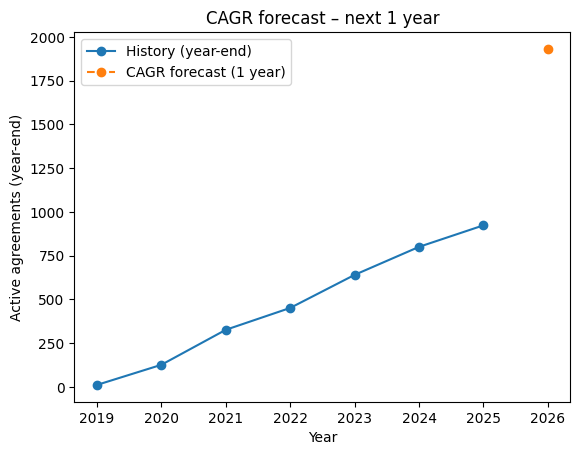

In [63]:
# --- Convert to yearly end-of-year values ---
year_end = temporal_series["active_companies"].resample("Y").last()
year_end.index = year_end.index.year  # cleaner index (year as int)

print("Year-end values:")
print(year_end)

# Compute CAGR between first and last year
start_val = year_end.iloc[0]
end_val = year_end.iloc[-1]
n_years = len(year_end) - 1

cagr = (end_val / start_val) ** (1 / n_years) - 1
print(f"\nCAGR over {n_years} years: {cagr:.2%}")

# Forecast horizon = 1 year
next_year = year_end.index.max() + 1
forecast_next_year = end_val * (1 + cagr)

cagr_forecast_1y = pd.Series(
    [forecast_next_year],
    index=[next_year],
    name="cagr_forecast"
)

print("\nCAGR forecast (next 1 year):")
print(cagr_forecast_1y)



plt.figure()
plt.plot(year_end.index, year_end.values, marker="o", label="History (year-end)")
plt.plot(cagr_forecast_1y.index, cagr_forecast_1y.values, marker="o", linestyle="--", label="CAGR forecast (1 year)")
plt.title("CAGR forecast – next 1 year")
plt.xlabel("Year")
plt.ylabel("Active agreements (year-end)")
plt.legend()
plt.show()



#### **XGBoost**

This lag-based ML approach works best when:

✔ You have a lot of data (hundreds or thousands of time points)
✔ The series is stationary (no strong trend)
✔ The future depends heavily on recent patterns
✔ There are nonlinear relationships between lags
✔ You also include exogenous features (calendar, promotions, capacity, etc.)

In [34]:
df = temporal_series.copy()

# Create 100 lag features
for i in range(1, 101):
    df[f"lag_{i}"] = df["active_companies"].shift(i)

df.head(6)


/var/folders/_3/sryc3_nj66vgwtq9swf_681m0000gn/T/ipykernel_60720/2683881770.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"lag_{i}"] = df["active_companies"].shift(i)
/var/folders/_3/sryc3_nj66vgwtq9swf_681m0000gn/T/ipykernel_60720/2683881770.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"lag_{i}"] = df["active_companies"].shift(i)
/var/folders/_3/sryc3_nj66vgwtq9swf_681m0000gn/T/ipykernel_60720/2683881770.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.

,date,active_companies,new_companies,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,...,lag_91,lag_92,lag_93,lag_94,lag_95,lag_96,lag_97,lag_98,lag_99,lag_100
0,2019-04-12,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-04-13,1,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-04-14,1,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-04-15,1,0.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-04-16,1,0.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2019-04-17,1,0.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
np.array(df.columns[3:])

array(['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6', 'lag_7',
       'lag_8', 'lag_9', 'lag_10', 'lag_11', 'lag_12', 'lag_13', 'lag_14',
       'lag_15', 'lag_16', 'lag_17', 'lag_18', 'lag_19', 'lag_20',
       'lag_21', 'lag_22', 'lag_23', 'lag_24', 'lag_25', 'lag_26',
       'lag_27', 'lag_28', 'lag_29', 'lag_30', 'lag_31', 'lag_32',
       'lag_33', 'lag_34', 'lag_35', 'lag_36', 'lag_37', 'lag_38',
       'lag_39', 'lag_40', 'lag_41', 'lag_42', 'lag_43', 'lag_44',
       'lag_45', 'lag_46', 'lag_47', 'lag_48', 'lag_49', 'lag_50',
       'lag_51', 'lag_52', 'lag_53', 'lag_54', 'lag_55', 'lag_56',
       'lag_57', 'lag_58', 'lag_59', 'lag_60', 'lag_61', 'lag_62',
       'lag_63', 'lag_64', 'lag_65', 'lag_66', 'lag_67', 'lag_68',
       'lag_69', 'lag_70', 'lag_71', 'lag_72', 'lag_73', 'lag_74',
       'lag_75', 'lag_76', 'lag_77', 'lag_78', 'lag_79', 'lag_80',
       'lag_81', 'lag_82', 'lag_83', 'lag_84', 'lag_85', 'lag_86',
       'lag_87', 'lag_88', 'lag_89', 'lag_90', 'lag

In [35]:
df.tail()

,date,active_companies,new_companies,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,...,lag_91,lag_92,lag_93,lag_94,lag_95,lag_96,lag_97,lag_98,lag_99,lag_100
2452,2025-12-28,923,0.0,923.0,928.0,928.0,928.0,928.0,928.0,928.0,...,918.0,918.0,923.0,923.0,923.0,923.0,923.0,914.0,914.0,927.0
2453,2025-12-29,923,0.0,923.0,923.0,928.0,928.0,928.0,928.0,928.0,...,938.0,918.0,918.0,923.0,923.0,923.0,923.0,923.0,914.0,914.0
2454,2025-12-30,923,0.0,923.0,923.0,923.0,928.0,928.0,928.0,928.0,...,937.0,938.0,918.0,918.0,923.0,923.0,923.0,923.0,923.0,914.0
2455,2025-12-31,923,0.0,923.0,923.0,923.0,923.0,928.0,928.0,928.0,...,936.0,937.0,938.0,918.0,918.0,923.0,923.0,923.0,923.0,923.0
2456,2026-01-01,923,0.0,923.0,923.0,923.0,923.0,923.0,928.0,928.0,...,936.0,936.0,937.0,938.0,918.0,918.0,923.0,923.0,923.0,923.0


In [36]:
df_model = df.dropna()
df_model.head()

,date,active_companies,new_companies,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,...,lag_91,lag_92,lag_93,lag_94,lag_95,lag_96,lag_97,lag_98,lag_99,lag_100
100,2019-07-21,2,0.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
101,2019-07-22,2,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
102,2019-07-23,2,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
103,2019-07-24,2,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
104,2019-07-25,2,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [43]:
X = df_model[df.columns[3:]]
y = df_model["active_companies"]


In [44]:
X

,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,...,lag_91,lag_92,lag_93,lag_94,lag_95,lag_96,lag_97,lag_98,lag_99,lag_100
100,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
101,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
102,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
103,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
104,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2452,923.0,928.0,928.0,928.0,928.0,928.0,928.0,928.0,930.0,930.0,...,918.0,918.0,923.0,923.0,923.0,923.0,923.0,914.0,914.0,927.0
2453,923.0,923.0,928.0,928.0,928.0,928.0,928.0,928.0,928.0,930.0,...,938.0,918.0,918.0,923.0,923.0,923.0,923.0,923.0,914.0,914.0
2454,923.0,923.0,923.0,928.0,928.0,928.0,928.0,928.0,928.0,928.0,...,937.0,938.0,918.0,918.0,923.0,923.0,923.0,923.0,923.0,914.0
2455,923.0,923.0,923.0,923.0,928.0,928.0,928.0,928.0,928.0,928.0,...,936.0,937.0,938.0,918.0,918.0,923.0,923.0,923.0,923.0,923.0


In [45]:
split_ratio = 0.8
split_index = int(len(df_model) * split_ratio)

X_train = X.iloc[:split_index]
X_test  = X.iloc[split_index:]

y_train = y.iloc[:split_index]
y_test  = y.iloc[split_index:]


In [46]:
model = XGBRegressor(
    n_estimators=300,
    max_depth=3,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="reg:squarederror",
    random_state=42
)

model.fit(X_train, y_train)


,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE:  {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.3f}")


MAE:  102.43
RMSE: 120.16
R²:   -2.656


#### **ARIMAX**

In [ ]:
# ARIMA is best for stationary time series or series made stationary via differencing.

#### **SARIMAX**

SARIMA extends ARIMA by adding:

Seasonality (S) → monthly, yearly patterns

Key point:

Use SARIMA only if seasonality is present.

### **Monthly Growth Analysis (Last 3 Years)**

In [103]:
dataE01_active = dataE01[dataE01["status"]=="Active"]
print(len(dataE01_active))
dataE01_active.head()

1956


,agreement_id,created_time_(zoho_crm),status,company_name,customer_name,email,va_legal_name,agreement_official_start_date,agreement_end_date
0,12530111069,2020-11-17,Active,Klipped Kippahs LLC,Jon Kaweblum,jonjon-k@investordbat.com,Wendy Madrid,2020-11-23,2026-01-01
27,12530111096,2023-05-19,Active,"Santos Immigration Law, LLC",Esmeralda Santos,esmeraldaesmerald-santo@legalincles.com,Viviana Silva,2023-05-22,2026-01-01
30,12530111099,2023-04-12,Active,Law Offices of Chris M. Ingram,Jackie Iffie,jackiej-iffie@otherassitake.com,Rodolfo Armendariz,2023-04-17,2026-01-01
34,12530111103,2023-03-08,Active,"Meissner Blasi, LLC",Thomas Meissner,tmeissnerthomas-meissner@creatorrecepve.com,Juan Gomez,2023-03-20,2026-01-01
35,12530111104,2023-05-24,Active,Latinx Parenting LLC,Leslie Priscilla,Leslielesl-pris@inccoordstant.org,Valeria Inoue,2023-05-30,2026-01-01


In [104]:
dataE01_active["duration_days"] = (dataE01_active["agreement_end_date"] - dataE01_active["agreement_official_start_date"]).dt.days

dataE01_active_affiliated = dataE01_active[dataE01_active["duration_days"] > 30][
    ["agreement_id", "company_name", "agreement_official_start_date", "agreement_end_date", "duration_days"]
].sort_values("duration_days", ascending=False)

dataE01_active_affiliated

/var/folders/_3/sryc3_nj66vgwtq9swf_681m0000gn/T/ipykernel_62409/2354827638.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataE01_active["duration_days"] = (dataE01_active["agreement_end_date"] - dataE01_active["agreement_official_start_date"]).dt.days


,agreement_id,company_name,agreement_official_start_date,agreement_end_date,duration_days
3176,12532077387,"GSA Focus, Inc.",2019-11-18,2026-01-01,2236
393,12531495205,Armstrong Legal,2020-06-18,2026-01-01,2023
964,12531598189,Dunfee Real Estate Services,2020-07-06,2026-01-01,2005
587,12531525531,DFCW LLC DBA Active Health Knee & Shoulder,2020-07-08,2026-01-01,2003
2305,12531841069,"Hawks Villafranca Law, PLLC",2020-08-18,2026-01-01,1962
...,...,...,...,...,...
5934,40715737207,Sames Automotive Group LLC,2025-12-01,2026-01-01,31
5924,40230987568,Hatching,2025-12-01,2026-01-01,31
5923,40071661122,Bushbalm,2025-12-01,2026-01-01,31
5913,39840778096,Five Star Painting of Wilmington DE,2025-12-01,2026-01-01,31


In [105]:
# Each company first and last activation date
company_lifecycle = (
    dataE01_active_affiliated.groupby("company_name", dropna=False)
    .agg(
        company_start=("agreement_official_start_date", "min"),
        company_end=("agreement_end_date", "max"),
    )
    .reset_index()
)

company_lifecycle["company_start_month"] = (
    pd.to_datetime(company_lifecycle["company_start"])
    .dt.to_period("M")
)

company_lifecycle["company_end_month"] = (
    pd.to_datetime(company_lifecycle["company_end"])
    .dt.to_period("M")
)
company_lifecycle

,company_name,company_start,company_end,company_start_month,company_end_month
0,1.5Degrees LLC (d.b.a OnePointFive),2023-11-06,2026-01-01,2023-11,2026-01
1,"101 Federal Street, LLC dba BSpoke Studios",2024-08-12,2026-01-01,2024-08,2026-01
2,10x Luxury Affiliate,2025-06-23,2026-01-01,2025-06,2026-01
3,2527767 Ontario Inc,2025-11-10,2026-01-01,2025-11,2026-01
4,5-Eleven Hoops,2024-08-12,2026-01-01,2024-08,2026-01
...,...,...,...,...,...
911,Zermatt Payments LLC,2025-07-28,2026-01-01,2025-07,2026-01
912,Zhang-Louie PLLC,2023-01-30,2026-01-01,2023-01,2026-01
913,"iThrive Wellness, LLC",2024-02-19,2026-01-01,2024-02,2026-01
914,"urSwim, LLC",2025-02-03,2026-01-01,2025-02,2026-01


In [106]:
# Create a date range covering the full period
month_range = pd.period_range(
    start=company_lifecycle["company_start_month"].min(),
    end=company_lifecycle["company_end_month"].max(),
    freq="M"
)

temporal_series = pd.DataFrame({"month": month_range})


In [107]:
# Count how many companies are active per day: start_month ≤ month ≤ end_month
temporal_series["active_companies"] = temporal_series["month"].apply(
    lambda m: (
        (company_lifecycle["company_start_month"] <= m)
        & (company_lifecycle["company_end_month"] >= m)
    ).sum()
)


In [88]:
temporal_series

,month,active_companies
0,2019-11,1
1,2019-12,1
2,2020-01,1
3,2020-02,1
4,2020-03,1
...,...,...
70,2025-09,827
71,2025-10,874
72,2025-11,907
73,2025-12,916


In [108]:
temporal_series["date"] = temporal_series["month"].dt.to_timestamp("M")
temporal_series = temporal_series.drop(columns="month")
temporal_series = temporal_series.sort_values("date")
temporal_series = temporal_series.set_index("date")
temporal_series


,active_companies
date,
2019-11-30,1
2019-12-31,1
2020-01-31,1
2020-02-29,1
2020-03-31,1
...,...
2025-09-30,827
2025-10-31,874
2025-11-30,907


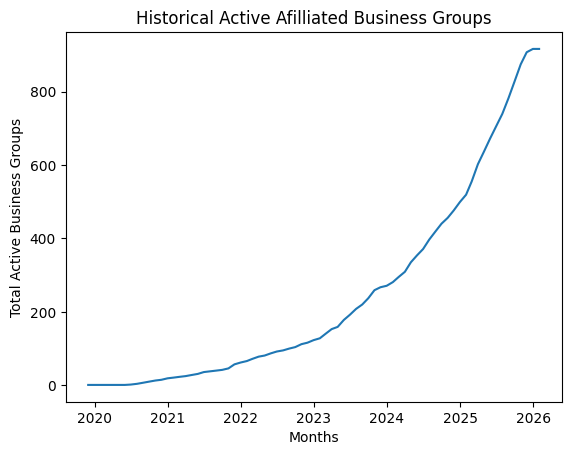

In [109]:
plt.figure()
plt.plot(
    temporal_series.index,
    temporal_series["active_companies"]
)
plt.xlabel("Months")
plt.ylabel("Total Active Business Groups")
plt.title("Historical Active Afilliated Business Groups")
plt.show()

In [110]:
temporal_series["monthly_increase"] = temporal_series["active_companies"].diff()
temporal_series["monthly_increase"] = temporal_series["monthly_increase"].fillna(0)

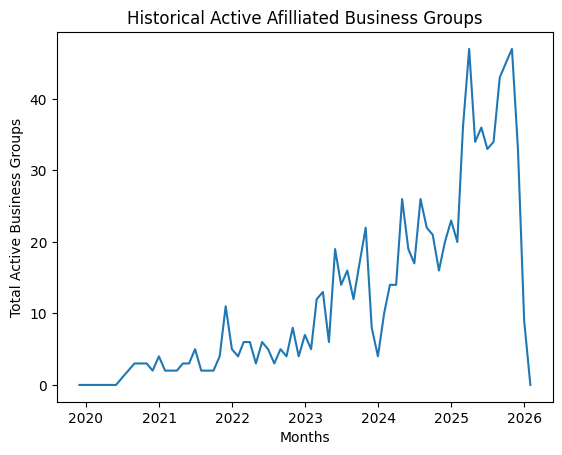

In [111]:
plt.figure()
plt.plot(
    temporal_series.index,
    temporal_series["monthly_increase"]
)
plt.xlabel("Months")
plt.ylabel("Total Active Business Groups")
plt.title("Historical Active Afilliated Business Groups")
plt.show()

In [112]:
temporal_series_last_3_y = temporal_series.loc[
    (temporal_series.index > "2022-12-31") &
    (temporal_series.index < "2026-01-01")
]


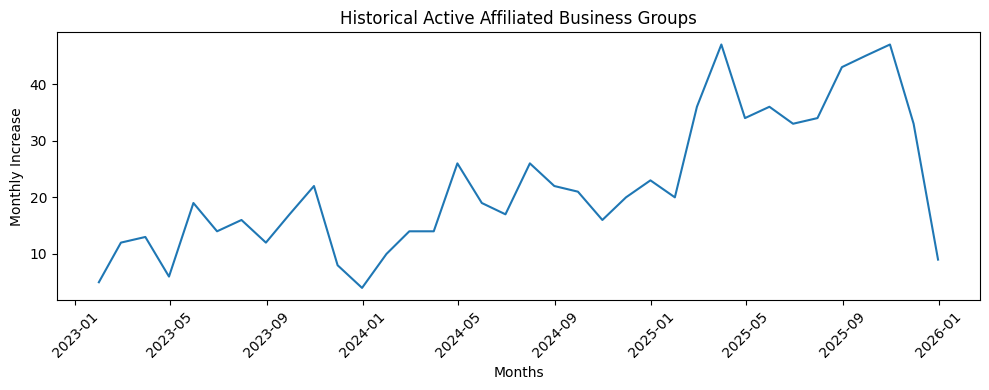

In [113]:
plt.figure(figsize=(10, 4))

plt.plot(
    temporal_series_last_3_y.index,
    temporal_series_last_3_y["monthly_increase"]
)

plt.xlabel("Months")
plt.ylabel("Monthly Increase")
plt.title("Historical Active Affiliated Business Groups")

plt.xticks(rotation=45)
plt.tight_layout()   # <- very important

plt.show()


Due that those are the Active affilliated all have the same end day, and the dynamic is drive by the start date: so there are months in which the onboarding process is higher. Specifically, each years there are to periods oh high onboarding with periods of low onboarding at the start, middle, and final part of each year.

AVERAGE ANUAL INCREMENT

In [119]:
temporal_series["date"] = temporal_series.index

In [120]:
temporal_series["year"] = temporal_series["date"].dt.year

annual_increase = (
    temporal_series
    .groupby("year")["monthly_increase"]
    .sum()
    .reset_index(name="annual_increase")
)



annual_increase


,year,annual_increase
0,2019,0.0
1,2020,18.0
2,2021,43.0
3,2022,61.0
4,2023,148.0
5,2024,228.0
6,2025,417.0
7,2026,0.0


In [122]:
temporal_series_anuall_avg_increment = annual_increase.set_index("year")

temporal_series_anuall_avg_increment = temporal_series_anuall_avg_increment.iloc[
 
    (temporal_series_anuall_avg_increment.index < 2026)
]

In [124]:

temporal_series_anuall_avg_increment["annual_increase"].mean()

np.float64(130.71428571428572)

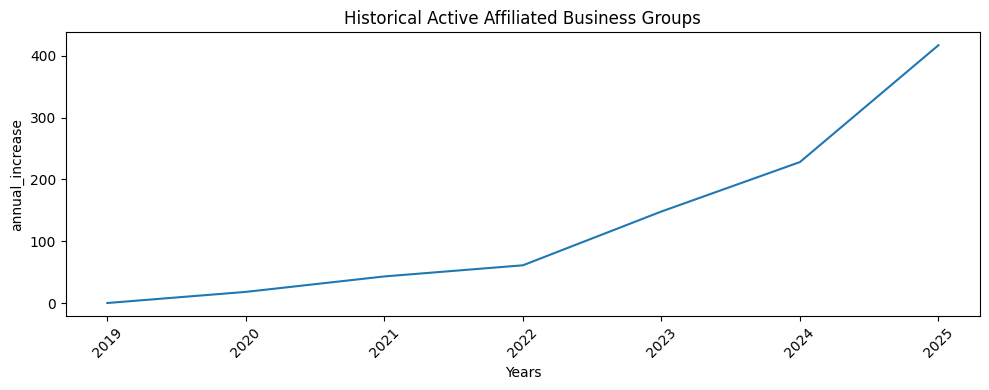

In [124]:
plt.figure(figsize=(10, 4))

plt.plot(
    temporal_series_anuall_avg_increment.index,
    temporal_series_anuall_avg_increment ["annual_increase"]
)

plt.xlabel("Years")
plt.ylabel("annual_increase")
plt.title("Historical Active Affiliated Business Groups")

plt.xticks(rotation=45)
plt.tight_layout()   # <- very important


### **Agreement Distribution Analysis**

#### AVERAGE ACCUMALTED AGREMENTS ACTIVE BY COMPANY AT THE END OF THE YEAR:
To estimate this variable I use each last day of the year from 2019 to 2025 as a threshold or cut point. For each company name I estimate the number of agreements with an start date lower than the threshold and a end date higher than the threshold. In such way, for each company I get the number of ACCUMULATE active agreements by the end of the year.

##### 1. FILTERING THE ONE IN ACTIVE STATUS

In [9]:
dataE01_active = dataE01[dataE01["status"]=="Active"]
print(len(dataE01_active))

1956


In [10]:
df = dataE01_active.copy()

# Build thresholds: last day of each year 2019..2025
thresholds = pd.DataFrame({
    "threshold_date": pd.to_datetime([f"{y}-12-31" for y in range(2019, 2026)])
})

# Cross join agreements x thresholds
df_x = df.merge(thresholds, how="cross")

# Active agreement condition at threshold
active = (
    (df_x["agreement_official_start_date"] <= df_x["threshold_date"]) &
    ((df_x["agreement_end_date"] >= df_x["threshold_date"]))
)

# Count active agreements per company and threshold
result = (
    df_x.loc[active]
        .groupby(["company_name", "threshold_date"], dropna=False)
        .size()
        .reset_index(name="active_agreements")
        .sort_values(["company_name", "threshold_date"])
)

result


,company_name,threshold_date,active_agreements
0,1.5Degrees LLC (d.b.a OnePointFive),2023-12-31,1
1,1.5Degrees LLC (d.b.a OnePointFive),2024-12-31,3
2,1.5Degrees LLC (d.b.a OnePointFive),2025-12-31,3
3,"101 Federal Street, LLC dba BSpoke Studios",2024-12-31,2
4,"101 Federal Street, LLC dba BSpoke Studios",2025-12-31,2
...,...,...,...
1893,Zhang-Louie PLLC,2025-12-31,3
1894,"iThrive Wellness, LLC",2024-12-31,3
1895,"iThrive Wellness, LLC",2025-12-31,3
1896,"urSwim, LLC",2025-12-31,1


In [11]:
avg_by_threshold = (
    result
        .groupby("threshold_date", as_index=False)
        .agg(
            avg_active_agreements=("active_agreements", "mean")
        )
)

avg_by_threshold

,threshold_date,avg_active_agreements
0,2019-12-31,1.000000
1,2020-12-31,1.157895
2,2021-12-31,1.209677
3,2022-12-31,1.504065
4,2023-12-31,1.785978
5,2024-12-31,2.030060
6,2025-12-31,2.119177


##### 2. WITHOUT FILTERING BY STATUS AND WITHOUT COUNT IN THE AVERAGE THE COMPANIES THAT IN SOME YEARS END WITH O AGREEMENTS

In [137]:
df = dataE01.copy()

# Build thresholds: last day of each year 2019..2025
thresholds = pd.DataFrame({
    "threshold_date": pd.to_datetime([f"{y}-12-31" for y in range(2019, 2026)])
})

# Cross join agreements x thresholds
df_x = df.merge(thresholds, how="cross")

# Active agreement condition at threshold
active = (
    (df_x["agreement_official_start_date"] <= df_x["threshold_date"]) &
    (
        df_x["agreement_end_date"].isna() |
        (df_x["agreement_end_date"] >= df_x["threshold_date"])
    )
)

# Count active agreements per company and threshold
result = (
    df_x.loc[active]
        .groupby(["company_name", "threshold_date"], dropna=False)
        .size()
        .reset_index(name="active_agreements")
        .sort_values(["company_name", "threshold_date"])
)

result


,company_name,threshold_date,active_agreements
0,1.5Degrees LLC (d.b.a OnePointFive),2023-12-31,1
1,1.5Degrees LLC (d.b.a OnePointFive),2024-12-31,3
2,1.5Degrees LLC (d.b.a OnePointFive),2025-12-31,3
3,"101 Federal Street, LLC dba BSpoke Studios",2024-12-31,2
4,"101 Federal Street, LLC dba BSpoke Studios",2025-12-31,2
...,...,...,...
3231,infraPLAN,2021-12-31,1
3232,seeUplay,2024-12-31,1
3233,"urSwim, LLC",2025-12-31,1
3234,"vi Experts, Inc",2025-12-31,1


In [140]:
thresholds

,threshold_date
0,2019-12-31
1,2020-12-31
2,2021-12-31
3,2022-12-31
4,2023-12-31
5,2024-12-31
6,2025-12-31


In [139]:
df_x

,agreement_id,created_time_(zoho_crm),status,company_name,customer_name,email,va_legal_name,agreement_official_start_date,agreement_end_date,threshold_date
0,12530111069,2020-11-17,Active,Klipped Kippahs LLC,Jon Kaweblum,jonjon-k@investordbat.com,Wendy Madrid,2020-11-23,2026-01-01,2019-12-31
1,12530111069,2020-11-17,Active,Klipped Kippahs LLC,Jon Kaweblum,jonjon-k@investordbat.com,Wendy Madrid,2020-11-23,2026-01-01,2020-12-31
2,12530111069,2020-11-17,Active,Klipped Kippahs LLC,Jon Kaweblum,jonjon-k@investordbat.com,Wendy Madrid,2020-11-23,2026-01-01,2021-12-31
3,12530111069,2020-11-17,Active,Klipped Kippahs LLC,Jon Kaweblum,jonjon-k@investordbat.com,Wendy Madrid,2020-11-23,2026-01-01,2022-12-31
4,12530111069,2020-11-17,Active,Klipped Kippahs LLC,Jon Kaweblum,jonjon-k@investordbat.com,Wendy Madrid,2020-11-23,2026-01-01,2023-12-31
...,...,...,...,...,...,...,...,...,...,...
41848,42430149412,2025-12-04,Pending,Bran Marketing,Alicia Branham,aliciaa-branh@legalexechome.com,William Seaman,NaT,NaT,2021-12-31
41849,42430149412,2025-12-04,Pending,Bran Marketing,Alicia Branham,aliciaa-branh@legalexechome.com,William Seaman,NaT,NaT,2022-12-31
41850,42430149412,2025-12-04,Pending,Bran Marketing,Alicia Branham,aliciaa-branh@legalexechome.com,William Seaman,NaT,NaT,2023-12-31
41851,42430149412,2025-12-04,Pending,Bran Marketing,Alicia Branham,aliciaa-branh@legalexechome.com,William Seaman,NaT,NaT,2024-12-31


In [142]:
active

0        False
1         True
2         True
3         True
4         True
         ...  
41848    False
41849    False
41850    False
41851    False
41852    False
Length: 41853, dtype: bool

In [141]:
df_x[df_x["company_name"]=="Klipped Kippahs LLC"]

,agreement_id,created_time_(zoho_crm),status,company_name,customer_name,email,va_legal_name,agreement_official_start_date,agreement_end_date,threshold_date
0,12530111069,2020-11-17,Active,Klipped Kippahs LLC,Jon Kaweblum,jonjon-k@investordbat.com,Wendy Madrid,2020-11-23,2026-01-01,2019-12-31
1,12530111069,2020-11-17,Active,Klipped Kippahs LLC,Jon Kaweblum,jonjon-k@investordbat.com,Wendy Madrid,2020-11-23,2026-01-01,2020-12-31
2,12530111069,2020-11-17,Active,Klipped Kippahs LLC,Jon Kaweblum,jonjon-k@investordbat.com,Wendy Madrid,2020-11-23,2026-01-01,2021-12-31
3,12530111069,2020-11-17,Active,Klipped Kippahs LLC,Jon Kaweblum,jonjon-k@investordbat.com,Wendy Madrid,2020-11-23,2026-01-01,2022-12-31
4,12530111069,2020-11-17,Active,Klipped Kippahs LLC,Jon Kaweblum,jonjon-k@investordbat.com,Wendy Madrid,2020-11-23,2026-01-01,2023-12-31
5,12530111069,2020-11-17,Active,Klipped Kippahs LLC,Jon Kaweblum,jonjon-k@investordbat.com,Wendy Madrid,2020-11-23,2026-01-01,2024-12-31
6,12530111069,2020-11-17,Active,Klipped Kippahs LLC,Jon Kaweblum,jonjon-k@investordbat.com,Wendy Madrid,2020-11-23,2026-01-01,2025-12-31
5929,12531579823,2021-08-26,Terminated by Client,Klipped Kippahs LLC,Jon Kaweblum,jonjon-k@investordbat.com,Karen Gorodezky,2021-08-31,2023-07-21,2019-12-31
5930,12531579823,2021-08-26,Terminated by Client,Klipped Kippahs LLC,Jon Kaweblum,jonjon-k@investordbat.com,Karen Gorodezky,2021-08-31,2023-07-21,2020-12-31
5931,12531579823,2021-08-26,Terminated by Client,Klipped Kippahs LLC,Jon Kaweblum,jonjon-k@investordbat.com,Karen Gorodezky,2021-08-31,2023-07-21,2021-12-31


In [144]:
df_x.loc[active][df_x.loc[active]["company_name"]=="Klipped Kippahs LLC"]

,agreement_id,created_time_(zoho_crm),status,company_name,customer_name,email,va_legal_name,agreement_official_start_date,agreement_end_date,threshold_date
1,12530111069,2020-11-17,Active,Klipped Kippahs LLC,Jon Kaweblum,jonjon-k@investordbat.com,Wendy Madrid,2020-11-23,2026-01-01,2020-12-31
2,12530111069,2020-11-17,Active,Klipped Kippahs LLC,Jon Kaweblum,jonjon-k@investordbat.com,Wendy Madrid,2020-11-23,2026-01-01,2021-12-31
3,12530111069,2020-11-17,Active,Klipped Kippahs LLC,Jon Kaweblum,jonjon-k@investordbat.com,Wendy Madrid,2020-11-23,2026-01-01,2022-12-31
4,12530111069,2020-11-17,Active,Klipped Kippahs LLC,Jon Kaweblum,jonjon-k@investordbat.com,Wendy Madrid,2020-11-23,2026-01-01,2023-12-31
5,12530111069,2020-11-17,Active,Klipped Kippahs LLC,Jon Kaweblum,jonjon-k@investordbat.com,Wendy Madrid,2020-11-23,2026-01-01,2024-12-31
6,12530111069,2020-11-17,Active,Klipped Kippahs LLC,Jon Kaweblum,jonjon-k@investordbat.com,Wendy Madrid,2020-11-23,2026-01-01,2025-12-31
5931,12531579823,2021-08-26,Terminated by Client,Klipped Kippahs LLC,Jon Kaweblum,jonjon-k@investordbat.com,Karen Gorodezky,2021-08-31,2023-07-21,2021-12-31
5932,12531579823,2021-08-26,Terminated by Client,Klipped Kippahs LLC,Jon Kaweblum,jonjon-k@investordbat.com,Karen Gorodezky,2021-08-31,2023-07-21,2022-12-31
6129,12531579922,2023-06-20,Active,Klipped Kippahs LLC,Jon Kaweblum,jonj-kawebl@dfwattost.com,Giovanna Matos,2023-06-26,2026-01-01,2023-12-31
6130,12531579922,2023-06-20,Active,Klipped Kippahs LLC,Jon Kaweblum,jonj-kawebl@dfwattost.com,Giovanna Matos,2023-06-26,2026-01-01,2024-12-31


In [129]:
result[result["active_agreements"]==7]

,company_name,threshold_date,active_agreements
69,Abacus Analytics,2024-12-31,7
168,Alvandi Law Group,2022-12-31,7
295,"Auto Legal Group, LLP",2024-12-31,7
422,Bloominari dba Virtual Latinos,2022-12-31,7
1129,Gian-Grasso & Tomczak P.C.,2025-12-31,7
1456,Johnson and Masumi PC,2021-12-31,7
1459,Johnson and Masumi PC,2024-12-31,7
1733,"Law Offices of Rachel L. Rado, LLC",2023-12-31,7
2323,Precision Signing Agency,2025-12-31,7
2770,Synergexmed,2025-12-31,7


In [130]:
result[result["company_name"]=="Abacus Analytics"]
	

,company_name,threshold_date,active_agreements
67,Abacus Analytics,2022-12-31,3
68,Abacus Analytics,2023-12-31,4
69,Abacus Analytics,2024-12-31,7
70,Abacus Analytics,2025-12-31,10


In [ ]:
avg_by_threshold = (
    result
        .groupby("threshold_date", as_index=False)
        .agg(
            avg_active_agreements=("active_agreements", "mean")
        )
)

avg_by_threshold
# It means that in average byt the end of the years the companies with active agrement have between 1.4 and 2.1 active agreements. 
# This variables has a increase trend.


,threshold_date,avg_active_agreements
0,2019-12-31,1.454545
1,2020-12-31,1.507937
2,2021-12-31,1.540625
3,2022-12-31,1.656885
4,2023-12-31,1.925278
5,2024-12-31,2.024235
6,2025-12-31,2.119177


##### 3. WITHOUT FILTERING BY STATUS AND WITH COUNT IN THE AVERAGE THE COMPANIES THAT IN SOME YEARS END WITH O AGREEMENTS

In [12]:
df = dataE01.copy()

# --- Step A: count active agreements per company-threshold (same as you did) ---
df_x = df.merge(thresholds, how="cross")

active = (
    (df_x["agreement_official_start_date"] <= df_x["threshold_date"]) &
    ((df_x["agreement_end_date"] >= df_x["threshold_date"]))
)

active_counts = (
    df_x.loc[active]
        .groupby(["company_name", "threshold_date"], dropna=False)
        .size()
        .reset_index(name="active_agreements")
)

# --- Step B: build the correct denominator (company is "in portfolio" by that threshold) ---
company_first_start = (
    df.groupby("company_name", dropna=False)["agreement_official_start_date"]
      .min()
      .reset_index(name="first_start_date")
)

denom = company_first_start.merge(thresholds, how="cross")
denom = denom[denom["first_start_date"] <= denom["threshold_date"]]

# --- Step C: merge counts onto denominator and fill missing with 0 ---
result_portfolio = (
    denom[["company_name", "threshold_date"]]
        .merge(active_counts, on=["company_name", "threshold_date"], how="left")
        .fillna({"active_agreements": 0})
)

result_portfolio["active_agreements"] = result_portfolio["active_agreements"].astype(int)

# result_portfolio is now exactly your rule:
# - no rows before company enters
# - rows after entry even if active_agreements = 0
result_portfolio


,company_name,threshold_date,active_agreements
0,1.5Degrees LLC (d.b.a OnePointFive),2023-12-31,1
1,1.5Degrees LLC (d.b.a OnePointFive),2024-12-31,3
2,1.5Degrees LLC (d.b.a OnePointFive),2025-12-31,3
3,"101 Federal Street, LLC dba BSpoke Studios",2024-12-31,2
4,"101 Federal Street, LLC dba BSpoke Studios",2025-12-31,2
...,...,...,...
6713,zinafayyad,2021-12-31,2
6714,zinafayyad,2022-12-31,0
6715,zinafayyad,2023-12-31,0
6716,zinafayyad,2024-12-31,0


In [13]:
denomavg_by_threshold = (
    result_portfolio
        .groupby("threshold_date", as_index=False)
        .agg(
            avg_active_agreements=("active_agreements", "mean")
        )
)

avg_by_threshold

,threshold_date,avg_active_agreements
0,2019-12-31,1.000000
1,2020-12-31,1.157895
2,2021-12-31,1.209677
3,2022-12-31,1.504065
4,2023-12-31,1.785978
5,2024-12-31,2.030060
6,2025-12-31,2.119177


In [156]:
result_portfolio[result_portfolio["active_agreements"]==0]["company_name"].unique()

array(['1031 Tax-Free Exchange Solutions', '10858 OPCO, LLC',
       '1st Advantage Business Solutions', ...,
       'nod Innovations Inc (d/b/a nodMD)', 'seeUplay', 'zinafayyad'],
      shape=(1364,), dtype=object)

In [ ]:
result_portfolio[result_portfolio["company_name"]=="zinafayyad"]

##### 4. ARE THERE CASES IN WHICH THE INACTIVE STATUS AGREEMENTS WERE ACTIVE FOR MORE THAN A YEAR (BY THE END OF A YEAR)

In [14]:
dataE01_inactive = dataE01[dataE01["status"]!="Active"]
print(len(dataE01_inactive))

3184


In [15]:
dataE01_inactive["status"].unique()

array(['Terminated by Client', 'Terminated by VA', 'Terminated by VL'],
      dtype=object)

In [16]:
df = dataE01_inactive.copy()

# --- Step A: count active agreements per company-threshold (same as you did) ---

thresholds = pd.DataFrame({
    "threshold_date": pd.to_datetime([f"{y}-12-31" for y in range(2019, 2026)])
})

df_x = df.merge(thresholds, how="cross")

active = (
    (df_x["agreement_official_start_date"] <= df_x["threshold_date"]) &
    ((df_x["agreement_end_date"] >= df_x["threshold_date"]))
)

active_counts = (
    df_x.loc[active]
        .groupby(["company_name", "threshold_date"], dropna=False)
        .size()
        .reset_index(name="active_agreements")
)

# --- Step B: build the correct denominator (company is "in portfolio" by that threshold) ---
company_first_start = (
    df.groupby("company_name", dropna=False)["agreement_official_start_date"]
      .min()
      .reset_index(name="first_start_date")
)

denom = company_first_start.merge(thresholds, how="cross")
denom = denom[denom["first_start_date"] <= denom["threshold_date"]]

# --- Step C: merge counts onto denominator and fill missing with 0 ---
result_portfolio = (
    denom[["company_name", "threshold_date"]]
        .merge(active_counts, on=["company_name", "threshold_date"], how="left")
        .fillna({"active_agreements": 0})
)

result_portfolio["active_agreements"] = result_portfolio["active_agreements"].astype(int)

# result_portfolio is now exactly your rule:
# - no rows before company enters
# - rows after entry even if active_agreements = 0
result_portfolio


,company_name,threshold_date,active_agreements
0,"101 Federal Street, LLC dba BSpoke Studios",2024-12-31,0
1,"101 Federal Street, LLC dba BSpoke Studios",2025-12-31,0
2,1031 Tax-Free Exchange Solutions,2025-12-31,0
3,"10858 OPCO, LLC",2023-12-31,1
4,"10858 OPCO, LLC",2024-12-31,0
...,...,...,...
5575,zinafayyad,2021-12-31,2
5576,zinafayyad,2022-12-31,0
5577,zinafayyad,2023-12-31,0
5578,zinafayyad,2024-12-31,0


In [17]:
avg_by_threshold = (
    result_portfolio
        .groupby("threshold_date", as_index=False)
        .agg(
            avg_active_agreements=("active_agreements", "mean")
        )
)

avg_by_threshold

,threshold_date,avg_active_agreements
0,2019-12-31,1.250000
1,2020-12-31,1.112583
2,2021-12-31,0.945701
3,2022-12-31,0.712062
4,2023-12-31,0.659710
5,2024-12-31,0.399721
6,2025-12-31,0.000000


#### AVERAGE ACCUMALTED AGREMENTS ACTIVE BY COMPANY AT THE END OF THE YEAR:
To estimate this variable I use each last day of the year from 2019 to 2025 as a threshold or cut point. For each company name I estimate the number of agreements with an start date lower than the threshold and a end date ALSO loer than the threshold. In such way, for each company I get the number of accumulate inactive agreements by the end of the year.

In [133]:
# Active agreement condition at threshold
inactive = (
    (df_x["agreement_official_start_date"] <= df_x["threshold_date"]) &
    (
        df_x["agreement_end_date"].isna() |
        (df_x["agreement_end_date"] <= df_x["threshold_date"])
    )
)

# Count active agreements per company and threshold
result = (
    df_x.loc[inactive]
        .groupby(["company_name", "threshold_date"], dropna=False)
        .size()
        .reset_index(name="inactive_agreements")
        .sort_values(["company_name", "threshold_date"])
)

result


,company_name,threshold_date,inactive_agreements
0,"101 Federal Street, LLC dba BSpoke Studios",2024-12-31,1
1,"101 Federal Street, LLC dba BSpoke Studios",2025-12-31,1
2,1031 Tax-Free Exchange Solutions,2025-12-31,1
3,"10858 OPCO, LLC",2024-12-31,1
4,"10858 OPCO, LLC",2025-12-31,1
...,...,...,...
4426,seeUplay,2025-12-31,1
4427,zinafayyad,2022-12-31,2
4428,zinafayyad,2023-12-31,2
4429,zinafayyad,2024-12-31,2


In [134]:
avg_by_threshold = (
    result
        .groupby("threshold_date", as_index=False)
        .agg(
            avg_inactive_agreements=("inactive_agreements", "mean")
        )
)

avg_by_threshold

,threshold_date,avg_inactive_agreements
0,2019-12-31,1.000000
1,2020-12-31,1.215686
2,2021-12-31,1.304545
3,2022-12-31,1.457031
4,2023-12-31,1.674593
5,2024-12-31,1.849873
6,2025-12-31,1.911164


#### AVERAGE NON-ACCUMALTED AGREMENTS ACTIVE BY COMPANY AT THE END OF THE YEAR:
To estimate this variable I use each last day of the year from 2019 to 2025 as a threshold or cut point. For each company name I estimate the number of agreements with an start date lower than the current threshold (but higher than the previous threshold) and a end date higher than the cuurent threshold. In such way, for each company I get the number of NON.ACCUMULATED active agreements by the end of the year.

#### AVERAGE NON-ACCUMALTED AGREMENTS INACTIVE BY COMPANY AT THE END OF THE YEAR:
To estimate this variable I use each last day of the year from 2019 to 2025 as a threshold or cut point. For each company name I estimate the number of agreements with an start date lower than the current threshold (but higher than the previous threshold) and a end date higher than the cuurent threshold. In such way, for each company I get the number of NON.ACCUMULATED inactive agreements by the end of the year.

### **Additional plots**

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_agreements_timeline(df, company, start_col="agreement_official_start_date",
                             end_col="agreement_end_date", id_col="agreement_id"):
    # Filter + sort
    d = df.loc[df["company_name"].eq(company), [id_col, start_col, end_col]].copy()
    d = d.sort_values(start_col).reset_index(drop=True)

    # Convert to matplotlib date numbers
    start_num = pd.to_datetime(d[start_col]).map(pd.Timestamp.toordinal)
    end_num   = pd.to_datetime(d[end_col]).map(pd.Timestamp.toordinal)

    # Durations (in days)
    durations = (end_num - start_num).astype(int)

    # Plot
    fig, ax = plt.subplots(figsize=(10, max(2.5, 0.7 * len(d))))

    y = range(len(d))
    ax.barh(y, durations, left=start_num, height=0.5)

    # Labels
    ax.set_yticks(list(y))
    ax.set_yticklabels(d[id_col].astype(str))
    ax.set_xlabel("Date")
    ax.set_title(f"Agreement timeline — {company}")

    # Format x-axis back to dates
    ticks = ax.get_xticks()
    ax.set_xticklabels([pd.Timestamp.fromordinal(int(t)).strftime("%Y-%m-%d") for t in ticks],
                       rotation=30, ha="right")

    # Optional: show start/end text on bars
    for i, (s, e) in enumerate(zip(pd.to_datetime(d[start_col]), pd.to_datetime(d[end_col]))):
        ax.text(s.toordinal(), i, s.strftime("%Y-%m-%d"), va="center", ha="left", fontsize=8)
        ax.text(e.toordinal(), i, e.strftime("%Y-%m-%d"), va="center", ha="right", fontsize=8)

    plt.tight_layout()
    plt.show()




/var/folders/_3/sryc3_nj66vgwtq9swf_681m0000gn/T/ipykernel_62409/97171779.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([pd.Timestamp.fromordinal(int(t)).strftime("%Y-%m-%d") for t in ticks],


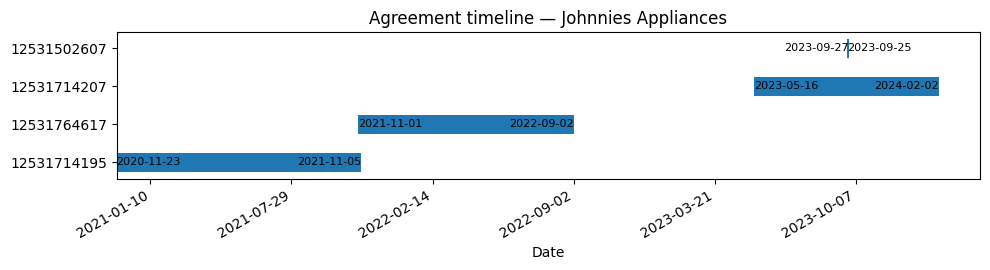

In [43]:
plot_agreements_timeline(dataE01, "Johnnies Appliances")

In [18]:
import pandas as pd
import numpy as np

df = dataE01.copy()

df["agreement_official_start_date"] = pd.to_datetime(df["agreement_official_start_date"])
df["agreement_end_date"] = pd.to_datetime(df["agreement_end_date"])


In [19]:
date_range = pd.date_range(
    start=df["agreement_official_start_date"].min(),
    end=df["agreement_end_date"].max() - pd.Timedelta(days=1),
    freq="D"
)


In [20]:
daily_active = pd.DataFrame({"date": date_range})

daily_active["active_companies"] = daily_active["date"].apply(
    lambda d: (
        df.loc[
            (df["agreement_official_start_date"] <= d) &
            (df["agreement_end_date"] > d),   # end date exclusive (business-clean)
            "company_name"
        ]
        .nunique()
    )
)


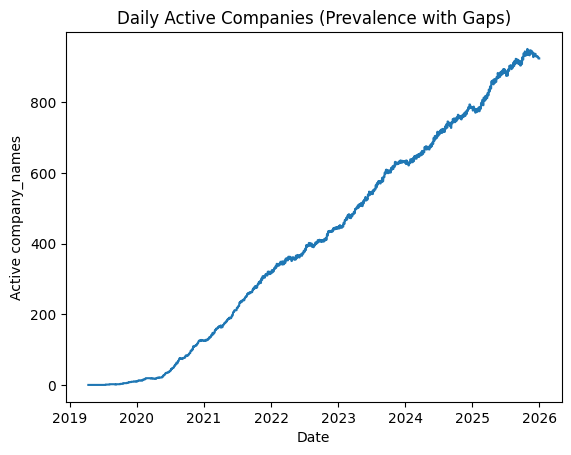

In [21]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(daily_active["date"], daily_active["active_companies"])
plt.xlabel("Date")
plt.ylabel("Active company_names")
plt.title("Daily Active Companies (Prevalence with Gaps)")
plt.show()
